In [ ]:
pip install texthero==1.0.5

In [2]:
import os.path
import pandas as pd
from pathlib import Path
import csv
from csv import writer
import texthero as hero
from texthero import preprocessing
def extractCSV(filepath):
    
    
    #Preprocessing using texthero package.
    df=pd.read_csv(filepath)
    custom_pipeline = [preprocessing.fillna,
                       preprocessing.lowercase,
                       preprocessing.remove_punctuation,
                       preprocessing.remove_diacritics,
                       preprocessing.remove_digits,
                       preprocessing.remove_whitespace]
    df['clean_pet_name']=hero.clean(df['pet_name'],custom_pipeline)
    df['clean_res_name']=hero.clean(df['res_name'],custom_pipeline)
    Pet_list=[]
    Pet_list=df['clean_pet_name'].tolist()
    Cino_list=df['cino'].tolist()
    Res_list=df['clean_res_name'].tolist()
    length= len(Pet_list)
    #Removing repeated words from company names which might hinder clustering
    stopwords1=["PVT","M","S","ORS","ANR","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "the" ,"whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "t", "can", "will", "just", "don", "should", "now","M/S","ANR","PRIVATE", "PRIVATELIMITED", "PRIVATELIMITED.", "PRIVATELTD", "LIMITED", "LIMITED(OPC)", "LIMITED,", "LIMITED.", "LIMTED", "LIMTIED","LTD", "LTD,", "LTD.", "LTD.,","PVT.", "PVT.LTD", "PVT.LTD.", "PVTLTD", "PVTLTD."]
    stopwords = [x.lower() for x in stopwords1]
    #print(stopwords)
    Firm_list=[]
    #Firm_list2=[]
    #Words to detect company names from the dataset 
    my_file = open("companies_keyword_list.txt", "r")
    firm_names=my_file.read()
    firm_names= [x.lower() for x in firm_names1]   
    
    
    #Method 
    
    for i in range(length):
        
    
        Firm_pet_list=[]
        Firm_res_list=[]
        if type(Pet_list[i])==str:
            query1=Pet_list[i].split()
        if type(Res_list[i])==str:
            query2=Res_list[i].split()
            
          
        if any(ext in query1 for ext in firm_names):
            
            #Firm_list2.append(Pet_list[i])
            query=(Pet_list[i]).split()
            resultwords  = [word for word in query if word not in stopwords]
            result = ' '.join(resultwords)
            Firm_pet_list.append(Cino_list[i])
            Firm_pet_list.append(result)
            Firm_list.append(Firm_pet_list)
      
        if any(ext in query2 for ext in firm_names):
            
            
            #Firm_list2.append(Res_list[i])
            query=(Res_list[i]).split()
            resultwords  = [word for word in query if word not in stopwords]
            result = ' '.join(resultwords)
            Firm_res_list.append(Cino_list[i])
            Firm_res_list.append(result)
            Firm_list.append(Firm_res_list) 
    
  
    
    
        
    
    return Firm_list
dir= "/home/ojas_d/WorldBank/2018"
c=1
List=[]
List1=[]
fields=['CINO','Firm_Name'] 
dataf=pd.DataFrame(List,columns=fields)
for filename in os.listdir(dir):  
    #if c==2:
    #break;
    filepath=os.path.join(dir, filename)
    #print(filepath)
    #myfile=Path('/home/ojas_d/WorldBank/2018/2018_case_data_39.csv')
    
    List=extractCSV(filepath)
    
    dataf = dataf.append(pd.DataFrame(List,columns=fields))
    #c=c+1  
    


/home/ojas_d/anaconda3/lib/python3.7/site-packages/texthero/preprocessing.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(r"^\d+\s|\s\d+\s|\s\d+$", " ")


In [3]:
dataf.shape

(110478, 2)

In [4]:

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer()
text=tfidf.fit_transform(dataf['Firm_Name'])
words = tfidf.get_feature_names()


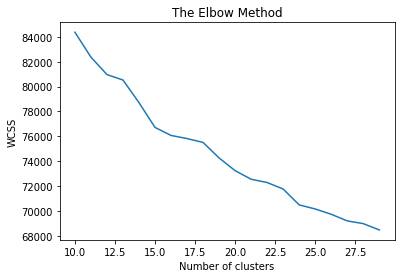

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(10,30):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(text)
    wcss.append(kmeans.inertia_)
plt.plot(range(10,30),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 29, n_init = 20,max_iter=300, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(text)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : hdfc, bank, gbj, gbe, gbans, gazipur, gaylord, gayatri, gayan, gaurding, gaya, gay, gawar, gavya, gautam, gauriya, gauri, zyxel, gaurdian, gc, gaurav, gaurang, gaur, gaukaran, gauges
1 : financial, services, toyota, hdb, india, bmw, ser, janalakshmi, tata, capital, ind, lakshmi, jana, orix, securities, leasing, usha, service, daimler, karvy, anmol, finance, atd, ptc, moneywise
2 : pooja, finlease, singh, finance, ltd9899784264, industries, gastric, gauriya, gbj, gbe, gbans, gazipur, gaylord, gayatri, gayan, gasoline, gaya, gay, gawar, gavya, gautam, gauri, gate, gaurding, gaurdian
3 : capital, first, trust, intec, reliance, home, finance, tata, financial, solution, india, corp, securities, electronics, finanace, lt, infrastructure, alias, holdings, power, future, gawar, gayatri, gavya, gay
4 : home, credit, india, finance, finances, fin, reliance, inida, opvt, fiance, ex, central, indian, managing, icici, director, bank, gaya, gayan, gayatri, gay, gaylord, gazipur, gbans, gateway
5

In [6]:
import sklearn.metrics as metrics

for i in range(20,3):
    labels = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=200).fit(text).labels_
    print("Silhoutte score for the kth clustster "+str(i)+"is " + str(metrics.silhouette_score(text,labels,sample_size=1000,random_state=200)))
    

Silhoutte score for the kth clustster 10is 0.1874349741333243
Silhoutte score for the kth clustster 11is 0.19705103990313216
Silhoutte score for the kth clustster 12is 0.22736730242495076
Silhoutte score for the kth clustster 13is 0.22847990876918595
Silhoutte score for the kth clustster 14is 0.2241395828009007
Silhoutte score for the kth clustster 15is 0.25799224151595573
Silhoutte score for the kth clustster 16is 0.2621124381844588
Silhoutte score for the kth clustster 17is 0.263951092126719
Silhoutte score for the kth clustster 18is 0.27410141769788543
Silhoutte score for the kth clustster 19is 0.28450760077273496
Silhoutte score for the kth clustster 20is 0.28608720856932823
Silhoutte score for the kth clustster 21is 0.29403229495347954
Silhoutte score for the kth clustster 22is 0.3043568373644348
Silhoutte score for the kth clustster 23is 0.30681932014359237
Silhoutte score for the kth clustster 24is 0.3088180282769465
Silhoutte score for the kth clustster 25is 0.318010849619778
S

In [ ]:

tf_idf_norm = normalize(text)
tf_idf_array = tf_idf_norm.toarray()
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
fitted = test_e.fit(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

